**TASK - 3**

IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

FUNCTION DEFINITION

In [2]:
def custom_VaR_analyzer(df,alpha,lookback,period):
  df['Log Return']=np.log(df["Closing Price"].pct_change()+1) # Calculation of daily log returns
  df['Standard_Deviations']=df["Log Return"].rolling(window=lookback).std() # Calculation of standard deviation in returns for the lookback period
  df['Period_Vol']=df['Standard_Deviations']*np.sqrt(period) # Calculation of periodic standard deviation
  factor=norm.ppf(1-alpha) # Calculation of multiplication factor for VaR calculation using the stated confidence level
  df['Period_Returns']=np.log(df['Closing Price'].shift(-period)/df['Closing Price']) # Calculation of periodic log returns
  df['Period_VaR']=df['Period_Vol']*factor # Calculation of periodic VaR
  df['Breach']=np.where(df['Period_Returns']<df['Period_VaR'],1,0) # Identification of VaR breaches for periodic data
  df['Daily Breach']=np.where(df['Log Return']<df['Standard_Deviations']*factor,1,0) # Identification of VaR breaches for daily data
  return df

INPUT DATA SPECIFICATION

In [3]:
df_nsdq=pd.read_csv('E1_NASDAQ100.csv')
df_nsdq.index=pd.to_datetime(df_nsdq["Date"]).dt.date
df_sp500=pd.read_csv('E1_SP500.csv')
df_sp500.index=pd.to_datetime(df_sp500["Date"]).dt.date
confidence_level=0.99
lookback=21
period=10

CALCULATIONS SPECIFIC TO S&P500

**B. VaR BREACHES PLOT FOR S&P500**

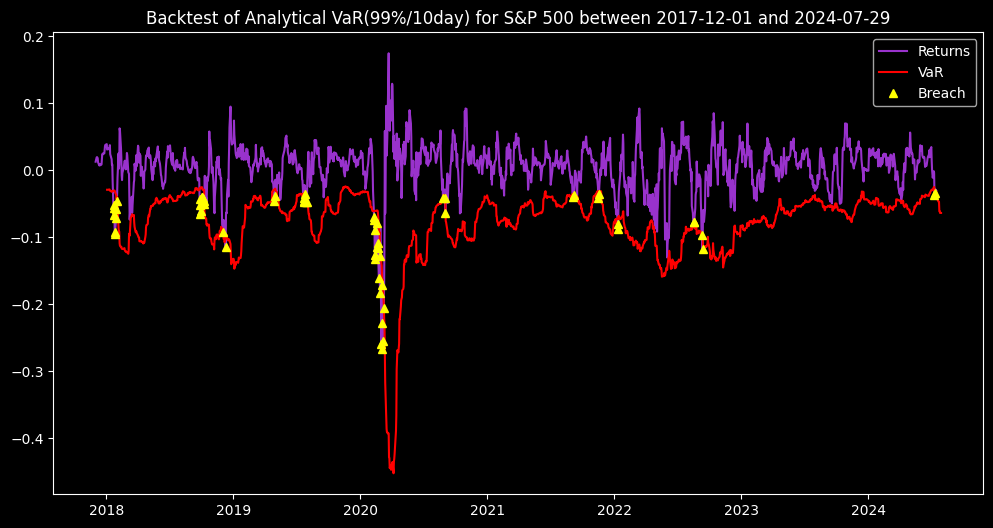

In [4]:
df1=custom_VaR_analyzer(df_sp500,confidence_level,lookback,period)
x_range=df1.shape[0]
df1[df1["Breach"]==1]
plt.style.use('dark_background')
plt.figure(figsize=(12, 6))
plt.plot(df1["Period_Returns"],label="Returns",color="darkorchid")
plt.plot(df1["Period_VaR"],label="VaR",color="red")
df1["markers"]=np.where((df1['Breach'] == 1), df1["Period_Returns"], np.nan)
plt.plot(df1["markers"], '^', label='Breach', color='yellow')
plt.legend()
t1="Backtest of Analytical VaR(99%/10day) for S&P 500 between "+str(df1.index[0])+" and "+str(df1.index[-1])
plt.title(t1)
plt.savefig('T3Plot1.png')
plt.show()

CALCULATIONS SPECIFIC TO NASDAQ-100

**B. VaR BREACHES PLOT FOR NASDAQ-100**

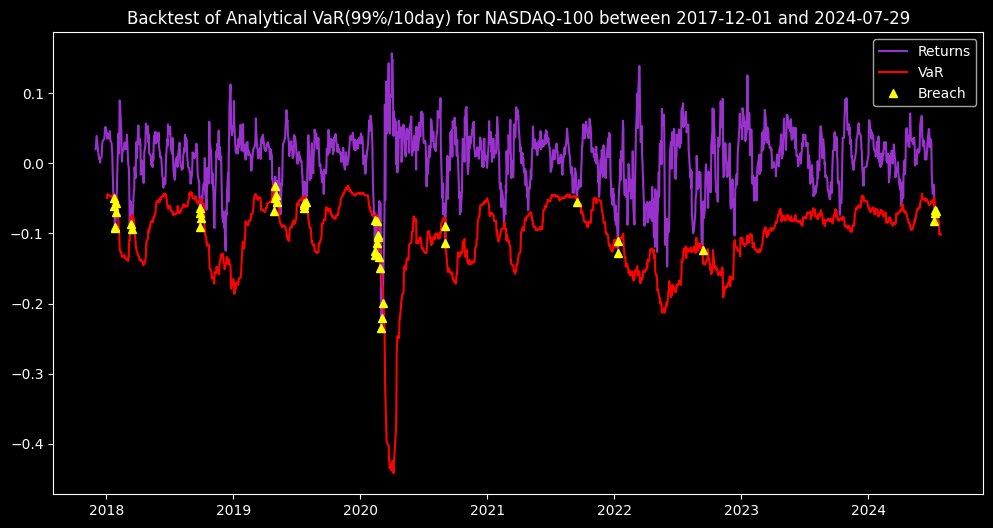

In [5]:
df2=custom_VaR_analyzer(df_nsdq,confidence_level,lookback,period)
df2[df2["Breach"]==1]
plt.style.use('dark_background')
plt.figure(figsize=(12, 6))
plt.plot(df2["Period_Returns"],label="Returns",color="darkorchid")
plt.plot(df2["Period_VaR"],label="VaR",color="red")
df2["markers"]=np.where((df2['Breach'] == 1), df2["Period_Returns"], np.nan)
plt.plot(df2["markers"], '^', label='Breach', color='yellow')
plt.legend()
t2="Backtest of Analytical VaR(99%/10day) for NASDAQ-100 between "+str(df2.index[0])+" and "+str(df2.index[-1])
plt.title(t2)
plt.savefig('T3Plot2.png')
plt.show()

**A. SUMMARY OCCURENCES OF VaR BREACHES DURING THE ENTIRE PERIOD**

In [6]:
presented_data=pd.DataFrame()
#presented_data["Expected Number of Breaches"]=[df_sp500.shape[0]*(1-confidence_level),df_nsdq.shape[0]*(1-confidence_level)]
presented_data["Actual Number of Breaches"]=[df1["Breach"].sum(),df2["Breach"].sum()]
presented_data["Precentage of Actual Number of Breaches"]=[(df1["Breach"].sum()/df1.shape[0])*100,(df2["Breach"].sum()/df2.shape[0])*100]
presented_data.index=["SP500","NASDAQ100"]
presented_data.to_excel("TASK3_summary.xlsx")
presented_data

,Actual Number of Breaches,Precentage of Actual Number of Breaches
SP500,61,3.646145
NASDAQ100,43,2.570233


**C. LIST OF VaR BREACHES FOR S&P500**

In [7]:
column_set=["Closing Price","Log Return","Period_VaR","Period_Returns"]
column_set1=["Closing Price","Log Return","VaR_10D","Ret_10D"]
breach_list_sp500=df1[df1.Breach==1][column_set]
breach_list_sp500.columns=column_set1
breach_list_sp500.to_excel("Breach_List_SP500.xlsx")
breach_list_sp500

,Closing Price,Log Return,VaR_10D,Ret_10D
Date,,,,
2018-01-22,2832.969971,0.008034,-0.030955,-0.067166
2018-01-23,2839.129883,0.002172,-0.030422,-0.052048
2018-01-24,2837.540039,-0.000560,-0.030868,-0.056502
2018-01-25,2839.250000,0.000602,-0.030626,-0.095363
2018-01-26,2872.870117,0.011772,-0.033196,-0.092309
...,...,...,...,...
2022-08-18,4283.740234,0.002267,-0.076636,-0.076854
2022-09-09,4067.360107,0.015156,-0.094655,-0.096493
2022-09-12,4110.410156,0.010529,-0.096653,-0.117416


**C. LIST OF VaR BREACHES FOR NASDAQ-100**

In [8]:
breach_list_nsdaq=df2[df2.Breach==1][column_set]
breach_list_nsdaq.columns=column_set1
breach_list_nsdaq.to_excel("Breach_List_NASDAQ100.xlsx")
breach_list_nsdaq

,Closing Price,Log Return,VaR_10D,Ret_10D
Date,,,,
2018-01-22,6906.279785,0.010473,-0.045831,-0.061257
2018-01-24,6919.350098,-0.006355,-0.048342,-0.049980
2018-01-25,6916.299805,-0.000441,-0.048180,-0.092363
2018-01-26,7022.970215,0.015305,-0.049832,-0.090909
2018-01-29,6988.319824,-0.004946,-0.051618,-0.068775
2018-01-30,6930.729980,-0.008275,-0.055070,-0.055911
2018-03-14,7040.979980,-0.000785,-0.077089,-0.085993
2018-03-16,7019.950195,-0.001569,-0.073569,-0.093890
2018-09-26,7563.089844,-0.000013,-0.053036,-0.071033


**D. REFERENCE DATA FOR RELATIVE COMPARISON OF THE RISK ASSOCIATED WITH S&P500 AND NASDAQ-100 AT THE ONSET OF THE COVID-19 PANDEMIC AND DURING THE CORRECTION PERIOD THEREOF**

In [9]:
sp500_c19=df1[(pd.to_datetime(df1.index)>=pd.to_datetime('2020-02-01')) & (pd.to_datetime(df1.index)<=pd.to_datetime('2020-03-31'))]
sp500_pc19=df1[(pd.to_datetime(df1.index)>=pd.to_datetime('2021-01-01')) & (pd.to_datetime(df1.index)<=pd.to_datetime('2022-12-31'))]
nasdaq_c19=df2[(pd.to_datetime(df2.index)>=pd.to_datetime('2020-02-01')) & (pd.to_datetime(df2.index)<=pd.to_datetime('2020-03-31'))]
nasdaq_pc19=df2[(pd.to_datetime(df2.index)>=pd.to_datetime('2021-01-01')) & (pd.to_datetime(df2.index)<=pd.to_datetime('2022-12-31'))]
columns=[("Pandemic Period (Feb 2020-March 2020)", "Pandemic Period (Feb 2020-March 2020)", "Pandemic Period (Feb 2020-March 2020)", "Pandemic Period (Feb 2020-March 2020)",
          "Correction Period (2021-2022)","Correction Period (2021-2022)","Correction Period (2021-2022)", "Correction Period (2021-2022)"),
 ("Daily Volatility","Daily Breaches","10_Volatility","10D VaR Breaches","Daily Volatility","Daily Breaches","10D_Volatility","10D VaR Breaches")]
data=[[sp500_c19["Log Return"].std(),sp500_c19['Daily Breach'].sum(),sp500_c19["Period_Returns"].std(),sp500_c19.Breach.sum(),sp500_pc19["Log Return"].std(),sp500_pc19['Daily Breach'].sum(),sp500_pc19["Period_Returns"].std(),sp500_pc19.Breach.sum()],
      [nasdaq_c19["Log Return"].std(),nasdaq_c19['Daily Breach'].sum(),nasdaq_c19["Period_Returns"].std(),nasdaq_c19.Breach.sum(),nasdaq_pc19["Log Return"].std(),nasdaq_pc19['Daily Breach'].sum(),nasdaq_pc19["Period_Returns"].std(),nasdaq_pc19.Breach.sum()]]
breach_stat1=pd.DataFrame(data, columns=pd.MultiIndex.from_arrays(columns))
breach_stat1.index=["SP500","NASDAQ100"]
#title="Daily Volatility for the period from "+str(df1.index[0])+" to "+str(df1.index[-1])
#breach_stat1[title]=[df1["Log Return"].std(),df2["Log Return"].std()]
#title2="10D Volatility for the period from "+str(df1.index[0])+" to "+str(df1.index[-1])
#breach_stat1[title2]=[df1["Period_Returns"].std(),df2["Period_Returns"].std()]
breach_stat1.to_excel("Breach_statistics.xlsx")
breach_stat1

Pandemic Period (Feb 2020-March 2020)                               \
                               Daily Volatility Daily Breaches 10_Volatility   
SP500                                  0.044292              6      0.114882   
NASDAQ100                              0.043929              5      0.101926   

                           Correction Period (2021-2022)                 \
          10D VaR Breaches              Daily Volatility Daily Breaches   
SP500                   18                      0.012270             12   
NASDAQ100               12                      0.016704              7   

                                           
          10D_Volatility 10D VaR Breaches  
SP500           0.035383               10  
NASDAQ100       0.047044                4